<a href="https://colab.research.google.com/github/alonsosilvaallende/COVID-19/blob/master/COVID_19_deaths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [0]:
deaths = pd.read_csv("https://covid.ourworldindata.org/data/ecdc/total_deaths.csv", index_col='date')

In [3]:
deaths[["Spain", "Italy", "Chile", "France"]].tail(3)

,Spain,Italy,Chile,France
date,,,,
2020-04-02,9053,13157,16.0,4032.0
2020-04-03,10003,13917,18.0,4503.0
2020-04-04,10935,14681,22.0,NaN


In [0]:
list_countries = ["Spain", "Italy", "Chile", "France"]

In [0]:
TIPPING_POINT = 10

In [0]:
France_lockdown = '2020-03-18'
Italy_lockdown = '2020-03-10'
Spain_lockdown = '2020-03-15'

In [0]:
deaths_country = {}
for country in list_countries:
  deaths_country[country] = deaths[country][deaths[country]> TIPPING_POINT]

In [8]:
Spain_gap = (pd.to_datetime(Spain_lockdown) - pd.to_datetime(deaths_country["Spain"].keys()[0])).days
Italy_gap = (pd.to_datetime(Italy_lockdown) - pd.to_datetime(deaths_country["Italy"].keys()[0])).days
France_gap = (pd.to_datetime(France_lockdown) - pd.to_datetime(deaths_country["France"].keys()[0])).days
Spain_gap, Italy_gap, France_gap

(5, 13, 9)

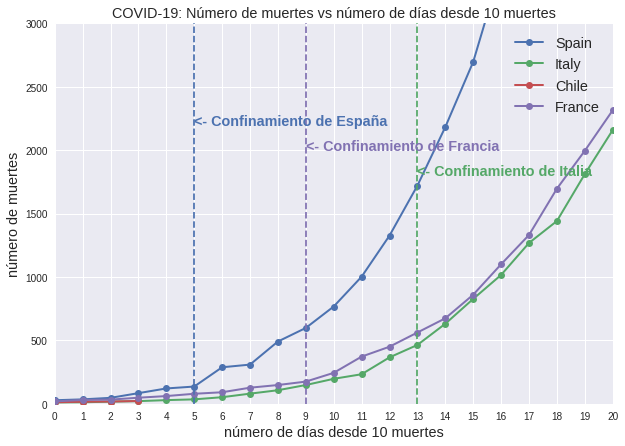

In [9]:
fig, ax = plt.subplots(figsize=(10,7))
for country in list_countries:
  plt.plot(np.arange(len(deaths_country[country])), deaths_country[country], label=country, linewidth=2, marker='o')

plt.axvline(Spain_gap, color='C0', linestyle='dashed')
plt.axvline(France_gap, color='C3', linestyle='dashed')
plt.axvline(Italy_gap, color='C1', linestyle='dashed')

# plt.annotate('<- Spain lockdown', (Spain_gap,2200.0), color='C0', fontsize='x-large', fontweight='bold')
# plt.annotate('<- France lockdown', (France_gap,2000.0), color='C3', fontsize='x-large', fontweight='bold')
# plt.annotate('<- Italy lockdown', (Italy_gap,1800.0), color='C1', fontsize='x-large', fontweight='bold')

plt.annotate('<- Confinamiento de España', (Spain_gap,2200.0), color='C0', fontsize='x-large', fontweight='bold')
plt.annotate('<- Confinamiento de Francia', (France_gap,2000.0), color='C3', fontsize='x-large', fontweight='bold')
plt.annotate('<- Confinamiento de Italia', (Italy_gap,1800.0), color='C1', fontsize='x-large', fontweight='bold')

# ax.set_title(f'COVID-19: Number of deaths vs days since {TIPPING_POINT} deaths', fontsize='x-large')
# ax.set_xlabel(f'number of days since {TIPPING_POINT} deaths', fontsize='x-large')
# ax.set_ylabel(f'number of deaths', fontsize='x-large')

ax.set_title(f'COVID-19: Número de muertes vs número de días desde {TIPPING_POINT} muertes', fontsize='x-large')
ax.set_xlabel(f'número de días desde {TIPPING_POINT} muertes', fontsize='x-large')
ax.set_ylabel(f'número de muertes', fontsize='x-large')

ax.set_xticks(np.arange(len(deaths_country["Italy"])))
plt.xlim(0,20)
plt.ylim(0,3000)
plt.legend(fontsize='x-large')
plt.savefig("2020-04-04-Deaths-Chile-vs-Several.png", format='png', dvi=500)

In logarithmic scale:

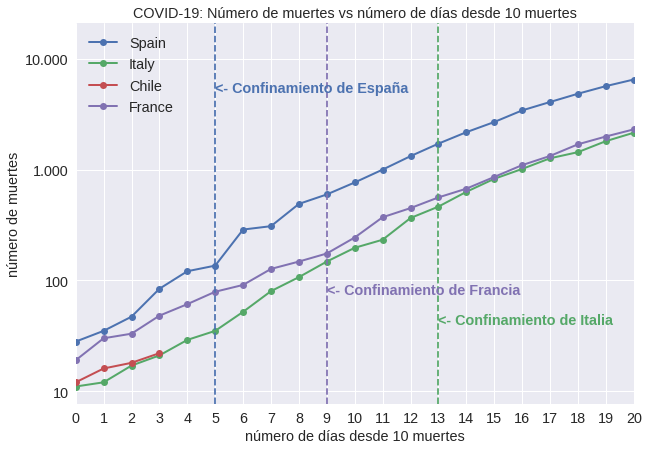

In [10]:
fig, ax = plt.subplots(figsize=(10,7))
for country in list_countries:
  ax.plot(np.arange(len(deaths_country[country])),deaths_country[country], label=country, linewidth=2, marker='o')
plt.axvline(Spain_gap, color='C0', linestyle='dashed')
plt.axvline(Italy_gap, color='C1', linestyle='dashed')
plt.axvline(France_gap, color='C3', linestyle='dashed')

# plt.annotate('<- Spain lockdown', (Spain_gap, 1000.0), color='C0', fontsize='x-large')
# plt.annotate('<- Italy lockdown', (Italy_gap, 50.0), color='C1', fontsize='x-large')
# plt.annotate('<- France lockdown', (France_gap, 75.0), color='C3', fontsize='x-large')

plt.annotate('<- Confinamiento de España', (Spain_gap, 5000.0), color='C0', fontsize='x-large', fontweight='bold')
plt.annotate('<- Confinamiento de Italia', (Italy_gap, 40.0), color='C1', fontsize='x-large', fontweight='bold')
plt.annotate('<- Confinamiento de Francia', (France_gap, 75.0), color='C3', fontsize='x-large', fontweight='bold')

# ax.set_title(f'COVID-19: Number of deaths vs number of days since {TIPPING_POINT} deaths', fontsize='x-large')
# ax.set_xlabel(f'number of days since {TIPPING_POINT} deaths', fontsize='x-large')
# ax.set_ylabel(f'number of deaths', fontsize='x-large')

ax.set_title(f'COVID-19: Número de muertes vs número de días desde {TIPPING_POINT} muertes', fontsize='x-large')
ax.set_xlabel(f'número de días desde {TIPPING_POINT} muertes', fontsize='x-large')
ax.set_ylabel(f'número de muertes', fontsize='x-large')

ax.set_xticks(np.arange(len(deaths_country["Italy"])))
ax.set_xticklabels(np.arange(len(deaths_country["Italy"])), fontsize='x-large')

plt.yscale("log")
ax.set_yticks([10,100,1000,10000])
ax.set_yticklabels(['10', '100', '1.000', '10.000'], fontsize='x-large')

plt.xlim(0,20)

plt.legend(fontsize='x-large')
plt.savefig("2020-04-04-Deaths-Chile-vs-Several_logscale.png", format='png', dvi=500)

In [0]:
from google.colab import files
files.download("2020-04-04-Deaths-Chile-vs-Several.png")

In [12]:
deaths["Spain"].loc['2020-03-16'], deaths['Italy'].loc['2020-03-11'], deaths["France"].loc['2020-03-18']

(288, 631, 175.0)